In [1]:
import numpy as np
import matplotlib.pyplot as plt


# Lecture 8: Chapter 8 Ordinary Differential Equations

## Exercise – Landau 8.4.4: Assessment RK2 versus RK4 versus RK45

 <span style="color: green;">They provide `rk4.py` and `rk45.py` codes to use. They also have a `rk2.py` file, and give the algorithm in eq (8.38),(8.39).  
 In website I only found `rk4Algor.py`.</span>


1) Write your own RK2 method, with the derivative function $ f(t,x) $ as a separate method.
  rk2 algorithm:
$$
y_{n+1} ≃ y_n +k_2, (rk2) \tag{8.38}
$$

$$
k_2 = hf (t_n + \frac{h}{2}, y_n + \frac{k_1}{2} ),\quad k_1 = hf(t_n, y_n), \tag{8.39}
$$

In [2]:
def rk2(t, h, N, y, f):
    k1=np.zeros(N); k2=np.zeros(N)
    k1 = h*f(t,y)                             
    k2 = h*f(t+h/2.,y+k1/2.)
    y=y+k2
    return y   

2) Use your RK2 to solve the equation of motion (8.7) or (8.26). Plot both the position $ x(t) $ and velocity $ dx/dt $ as functions of time.

$$
m \frac{d^2x}{dt^2} = F_{\text{ext}}(x,t) - kx^{p-1}. \tag{8.7}
$$
$$
\frac{dy^{(0)}}{dt} = y^{(1)}(t), \quad \frac{dy^{(1)}}{dt} = \frac{1}{m} \left[ F_{\text{ext}}(x,t) - k y^{(0)}(t)^{p-1} \right]. \tag{8.26}
$$

In [3]:
# f(t, y) based on equation (8.26)
def f(t, y, m, k, p, F_ext):
    """
    Computes dy/dt for the system:
    y[0] -> position x(t)
    y[1] -> velocity dx/dt
    """
    dydt = np.zeros(2)
    dydt[0] = y[1]  # dy(0)/dt = velocity
    dydt[1] = (1/m) * (F_ext(y[0], y[1], t) - k*y[0]**(p-1))  # dy(1)/dt = acceleration
    return dydt


# Define external force function F_ext(x, v, t)
# Addded v dependance for friction problem below 
def F_ext(x, v, t):
    return 0  #No external force

# Wrapper for f to match rk2 input
def f_wrapper(t, y):
    return f(t, y, m, k, p, F_ext)

<span style="color: green;"><b> Comment:</b>  
        I decided to work with `eq 8.26` since is easier to manipulate two 1st order differential equations than one 2nd order.
        My function `f` takes all the needed parameters in the eq and returns an array with 1 array for each of the equations
        `Eq 8.26` has an Fext term that I dont know if im going to use so i defined it as a separate function and set it to zero for now
        My `rk2` function takes different parametes than `f` function so i made a wrapper to handle that so i don't have to rewrite `rk2`</span>

3) Once your ODE solver is running, do a number of things to check that it is working well and that you know what $ h $ values to use:
   - (a) Adjust the parameters in your potential so that it corresponds to a pure harmonic oscillator (set $ p = 2 $ or $ \alpha = 0 $).  
     For an oscillator initially at rest, we have an analytic result with which to compare:
     $$
     x(t) = A \sin(\omega_0 t), \quad v = \omega_0 A \cos(\omega_0 t), \quad \omega_0 = \sqrt{k/m}. \tag{8.45}
     $$

In [4]:
# Define analytic solution for comparison
def analytic_solution(t, A, omega0):
    '''
    Evaluates the analytic solution directly 
    It comes from eq 8.45
    Inputs:
        t, an array for all times
        A, is constant 
        omega0, from k and m.
    Returns position and velocity
    '''
    #x = A  np.sin(omega0  t )#+ np.pi/2) #shift this guy to match the numerical solution
    #v = omega0  A  np.cos(omega0  t )#+ np.pi/2) #shift this guy to match the numerical solution

    # even better lets rewrite it with cos instead of sin
    x = A * np.cos(omega0 * t)  # Use cos() to start at x=A
    v = -omega0 * A * np.sin(omega0 * t) 
    return x, v

In [5]:
def plotGraphs(t0,t_final, y0 ,h=.1,m=1.,k=1.,p=2,A=1.):
    omega0 = np.sqrt(k/m)
     
    N_steps = int((t_final - t0) / h)
    t_values = np.linspace(t0, t_final, N_steps)
    y_values = np.zeros((N_steps, 2))
    y_values[0] = y0 #array with inital velocity and position
    
    # Solve numerically
    y = y0.copy() #we stack values on a copy not the original array
    for i in range(1, N_steps):
        y = rk2(t_values[i-1], h, 2, y, f_wrapper) 
        y_values[i] = y
    
    # Evaluate analytic
    x_analytic, v_analytic = analytic_solution(t_values, A, omega0)

    plt.figure(figsize=(12, 6))
    
    plt.subplot(2, 1, 1)
    plt.plot(t_values, y_values[:, 0], label=f'Numerical', linestyle='--')
    plt.plot(t_values, x_analytic, label=f'Analytic', alpha=0.6)
    
    
    plt.subplot(2, 1, 2)
    plt.plot(t_values, y_values[:, 1], label=f'Numerical', linestyle='--')
    plt.plot(t_values, v_analytic, label=f'Analytic', alpha=0.6)
    
    
    plt.subplot(2, 1, 1)
    plt.xlabel("Time $t$")
    plt.ylabel("Position $x(t)$")
    plt.legend()
    plt.grid()
    
    plt.subplot(2, 1, 2)
    plt.xlabel("Time $t$")
    plt.ylabel("Velocity $dx/dt$")
    plt.legend()
    plt.grid()
    
    plt.tight_layout()
    plt.show()

- (b) Pick values of $ k $ and $ m $ such that the period $ T = 2\pi/\omega $ is a nice number to work with (something like $ T = 1 $).
- (c) Start with a step size $ h \approx T/5 $ and make $ h $ smaller until the solution looks smooth, has a period that remains constant for a large number of cycles, and agrees with the analytic result. Always try to start with a large $ h $ so that you can see a bad solution turn good.
- (d) Make sure that you have exactly the same initial conditions for the analytic and numerical solutions (zero displacement, nonzero velocity), and then plot the two together. It is good if you cannot tell them apart, yet that is not much of a test since it only ensures approximately two places of agreement.

Running with h = 0.20000


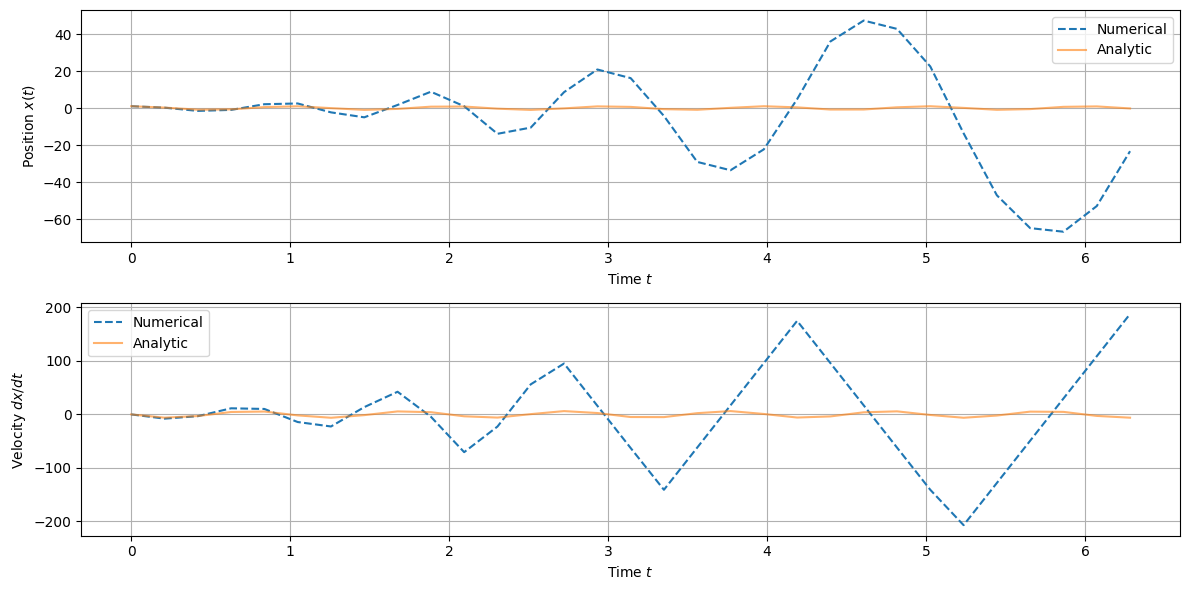

Running with h = 0.10000


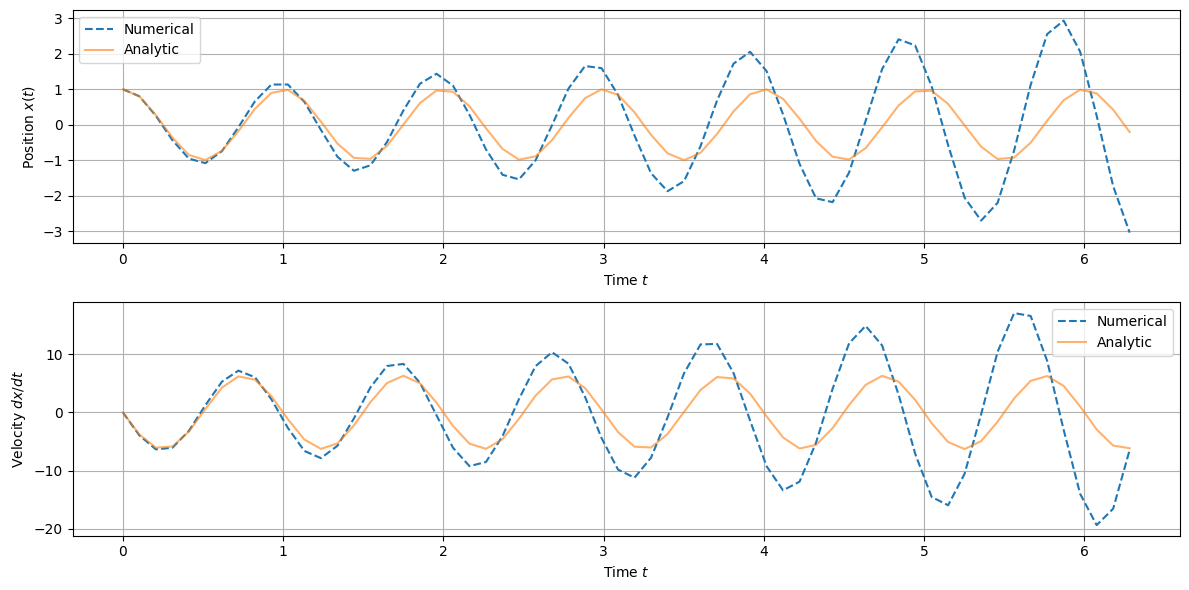

Running with h = 0.05000


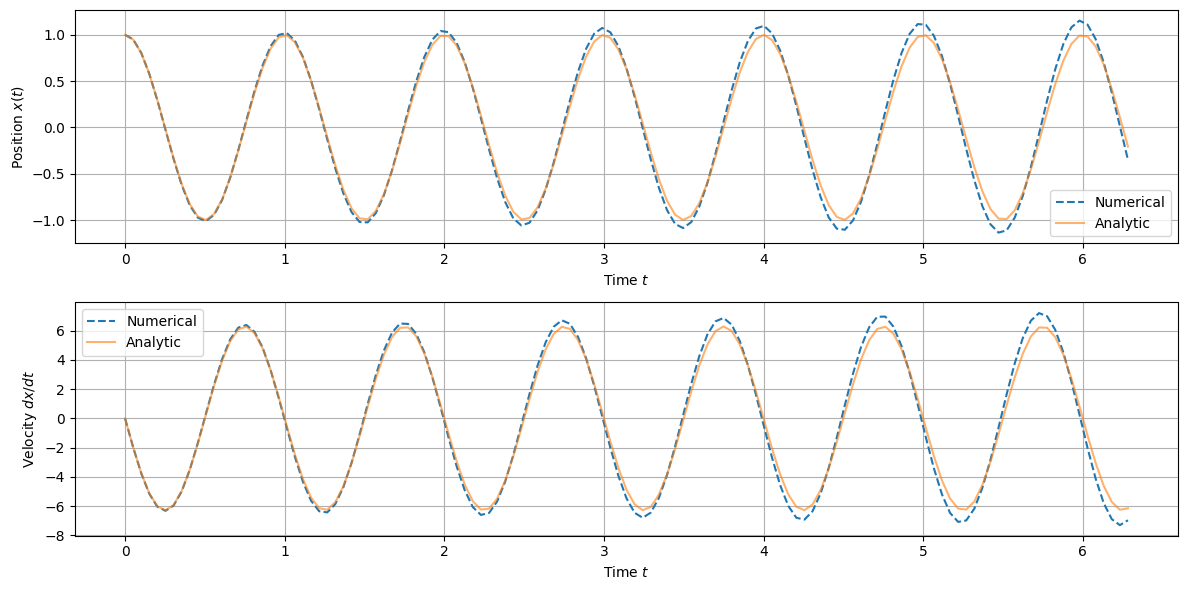

Running with h = 0.02000


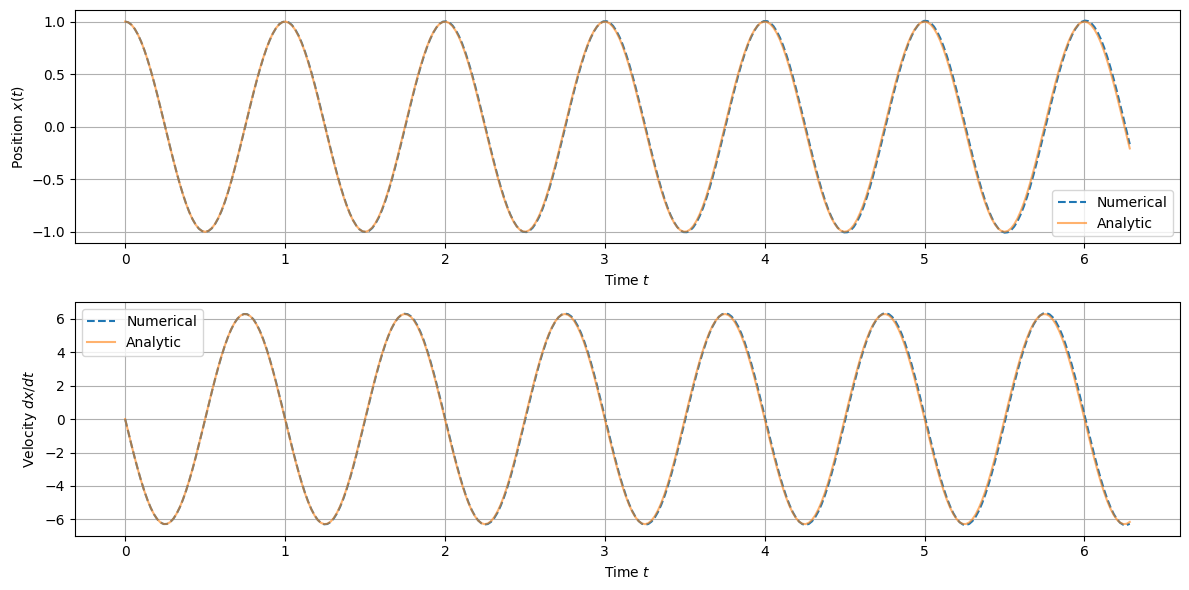

Running with h = 0.01000


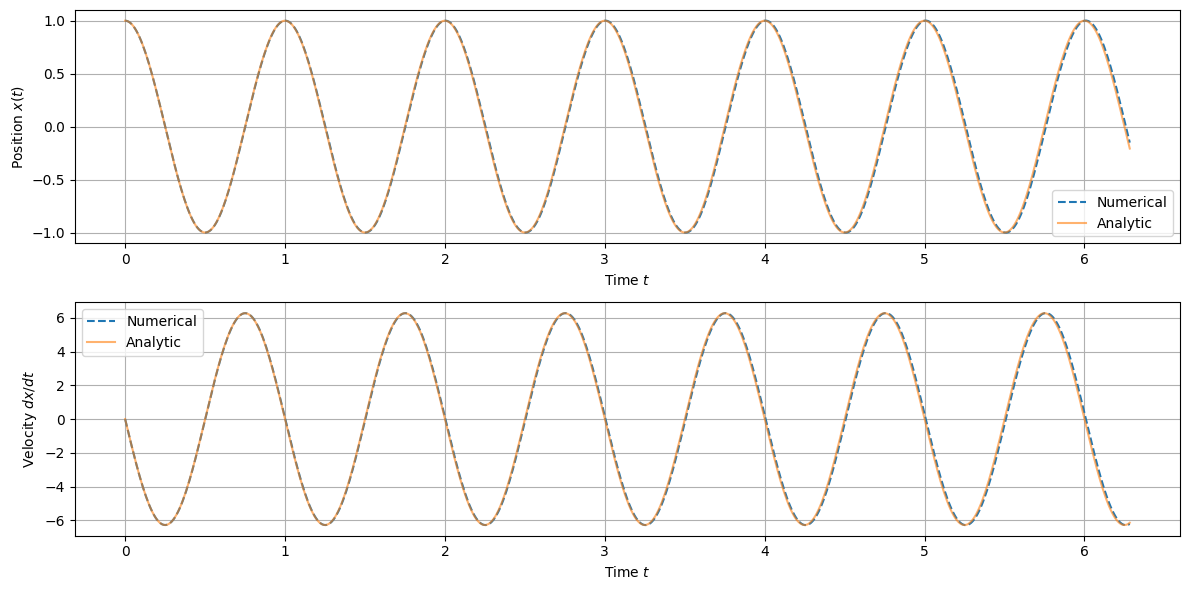

In [6]:
t0=0.0
t_final=2*np.pi
A=1.
y0 = np.array([A, 0.0]) # [Initial Position, Initial Velocity]

#b)
m=1. # if m = 1
k=4 * np.pi ** 2 # then k must be 4pi^2 for T = 1
p=2 #set to 2 so is simple harmonic

# check T, find T for c)
omega0 = np.sqrt(k/m)
T = 2*np.pi / omega0

#c) we can cycle here
h_values = [T/5, T/10, T/20, T/50, T/100]  # Start large, decrease

# Run multiple simulations with different h values
for h in h_values:
    print(f"Running with h = {h:.5f}")
    plotGraphs(t0, t_final, y0, h, m, k, p, A)

- (e) Try different initial velocities and verify that a harmonic oscillator is isochronous, that is, that its period does not change as the amplitude varies.


Running with initial velocity v0 = 0.00


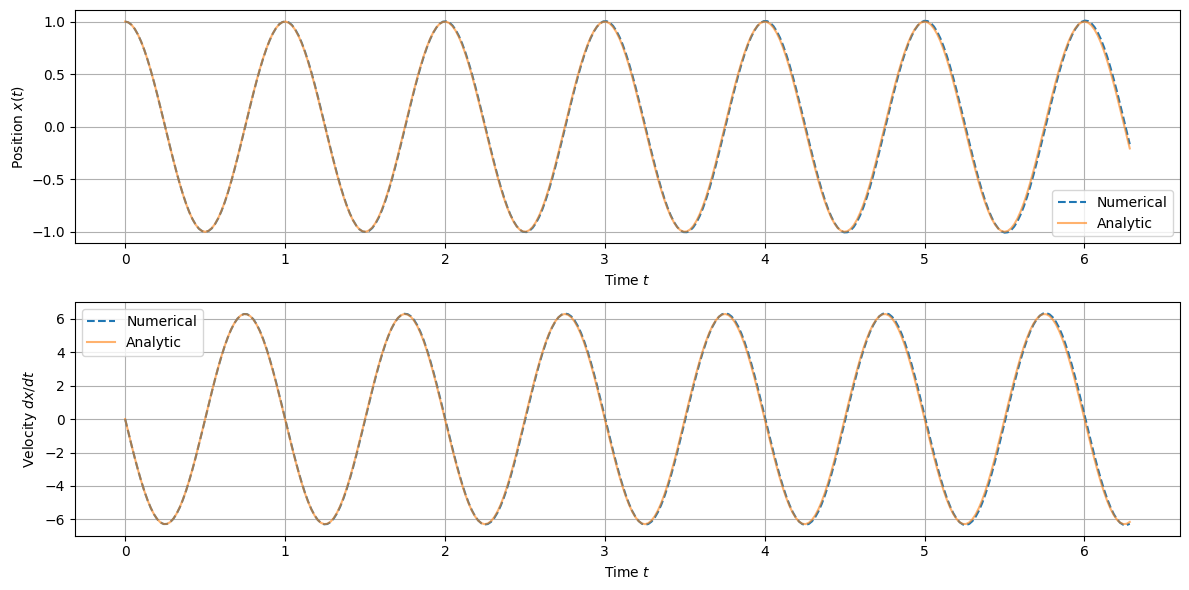

Running with initial velocity v0 = 1.00


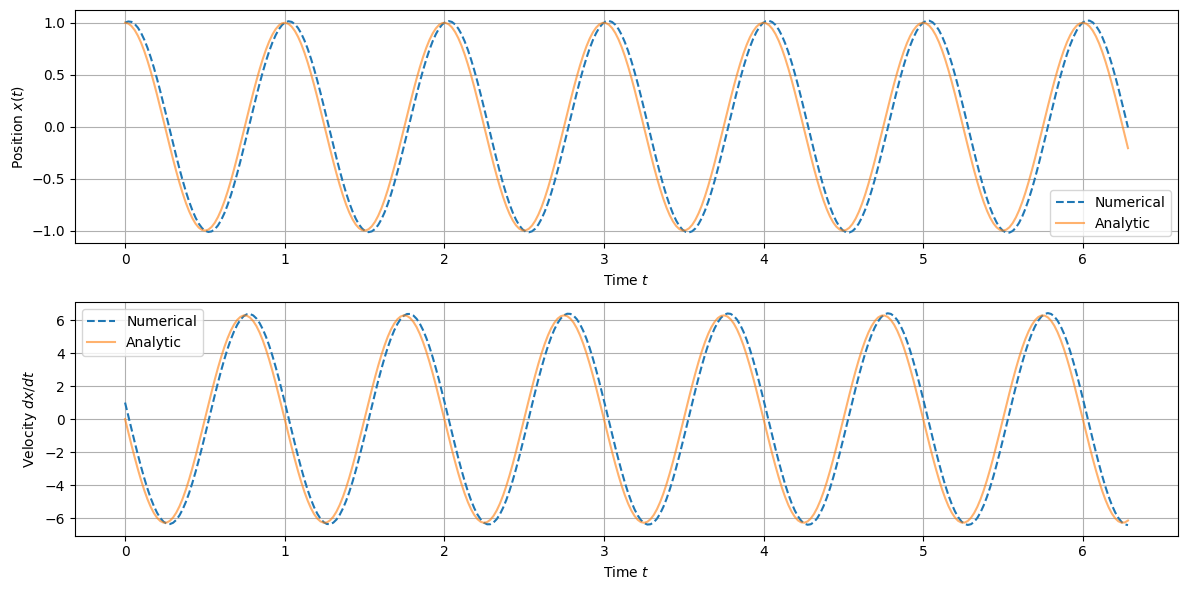

Running with initial velocity v0 = 2.00


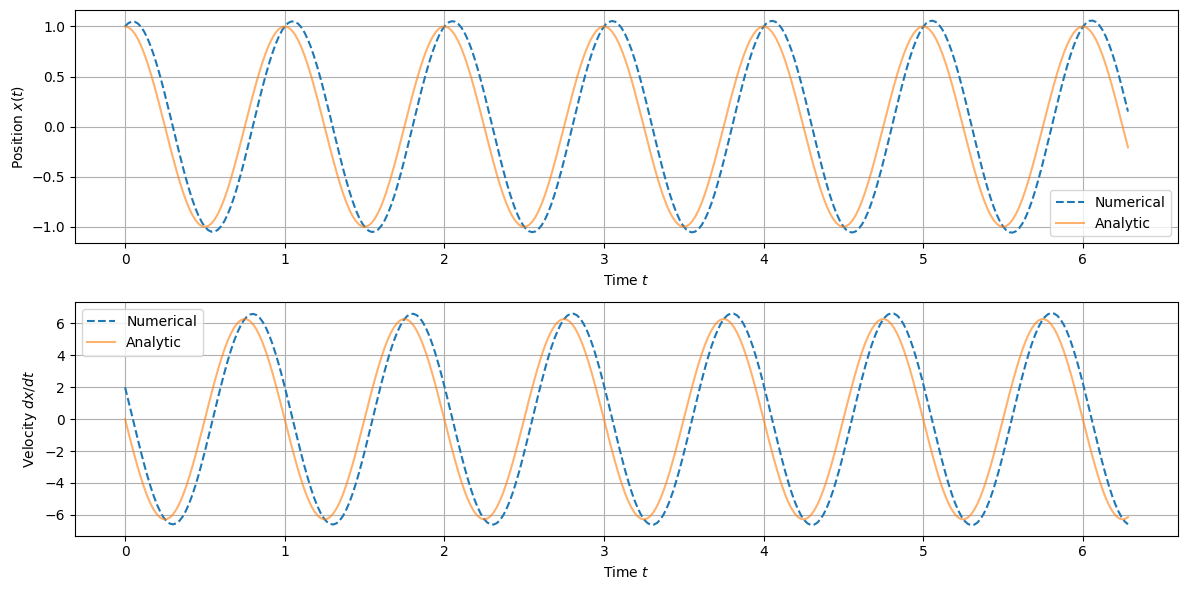

Running with initial velocity v0 = -1.00


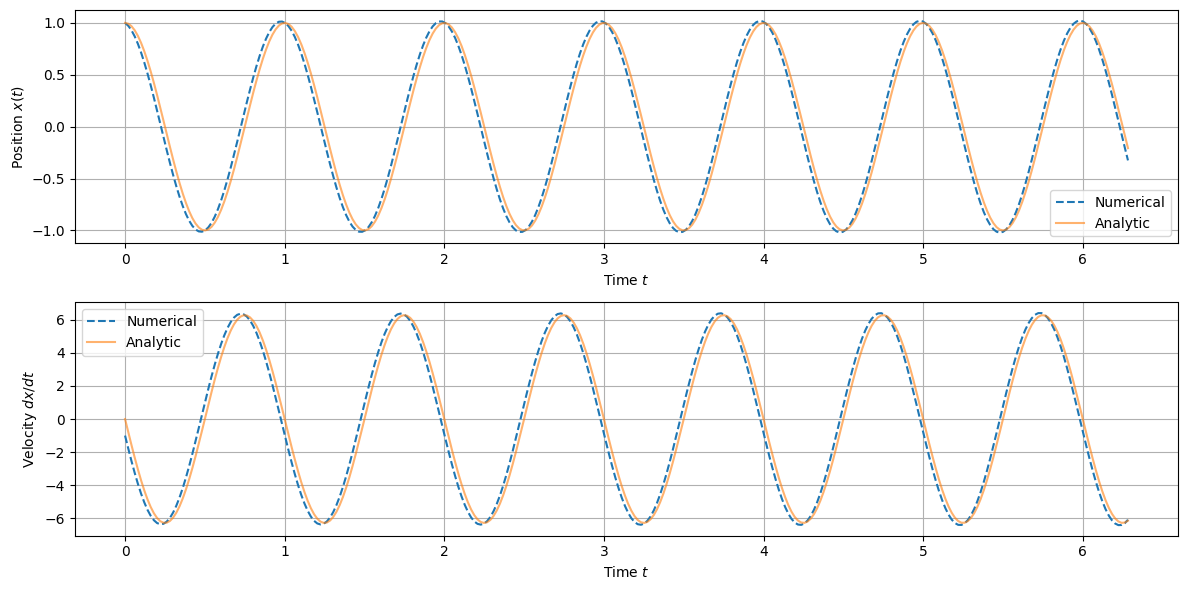

Running with initial velocity v0 = -2.00


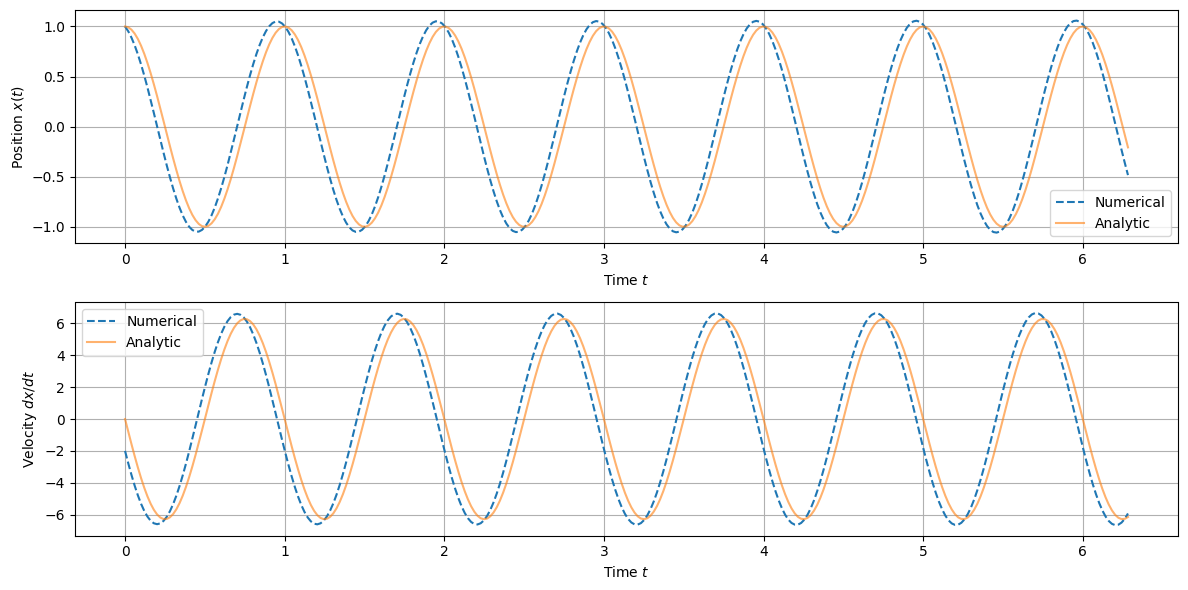

In [7]:
initial_velocities = [0.0, 1.0, 2.0, -1.0, -2.0]
h = T/50 #good enough

# Loop over different initial velocities
for v0 in initial_velocities:
    print(f"Running with initial velocity v0 = {v0:.2f}")
    y0 = np.array([A, v0])  # Modify initial velocity
    plotGraphs(t0, t_final, y0, h, m, k, p, A)

<span style="color: green;"><b> Comment:</b>  
    Analytic solution does not change since we are not changing its initial conditions, A or omega0
</span>

4) Now that you know you can get a good solution of an ODE with RK2, compare the solutions obtained with the RK2, RK4, and RK45 solvers.

In [8]:
def rk4(t, h, N, y, f):
    k1 = h*f(t,y)                             
    k2 = h*f(t+h/2.,y+k1/2.)
    k3 = h*f(t+h/2.,y+k2/2.)
    k4 = h*f(t+h,y+k3)
    y=y+(k1+2*(k2+k3)+k4)/6.
    return y 

def rk45(t, h, N, y, f,Tol=1e-6, hmin=1e-6, hmax=0.1):
    '''
    Takes same parameters as rk2 and rk4
    
    Added parameters Tol=1e-6, hmin=1e-6, hmax=0.1
    So it can be adaptative as in book code

    Calculates each k and uses them to get two estimates,
    compares and adjusts h
    returns y_new, t_new, h_new
    y_new final solution
    t_new, h_new, updated time and updated step size 
    '''
    #k1=np.zeros(N); k2=np.zeros(N); k3=np.zeros(N); k4=np.zeros(N); k5=np.zeros(N); k6=np.zeros(N)
    #no initialize since this is an adaptative method
    k1 = h * f(t, y)
    k2 = h * f(t + h/4., y + k1/4.)
    k3 = h * f(t + 3*h/8., y + (3*k1 + 9*k2) / 32.)
    k4 = h * f(t + 12*h/13., y + (1932*k1 - 7200*k2 + 7296*k3) / 2197.)
    k5 = h * f(t + h, y + (439*k1 / 216. - 8*k2 + 3680*k3 / 513. - 845*k4 / 4104.))
    k6 = h * f(t + h/2., y + (-8*k1 / 27. + 2*k2 - 3544*k3 / 2565. + 1859*k4 / 4104. - 11*k5 / 40.))

    # 4th-order estimate (used for comparison)
    y4 = y + (25*k1 / 216. + 1408*k3 / 2565. + 2197*k4 / 4104. - k5 / 5.)
    
    # 5th-order estimate (more accurate)
    y5 = y + (16*k1 / 135. + 6656*k3 / 12825. + 28561*k4 / 56430. - 9*k5 / 50. + 2*k6 / 55.)

    # error estimate
    error = np.abs(y5 - y4)

    # scale factor for step size adjustment
    s = 0.84 * (Tol * h / np.max(error))*0.25 if np.max(error) > 0 else 1.0

    # Adjust step size
    if np.max(error) > Tol:  # Error too large, decrease step size
        h_new = max(h / 2, hmin)  # Reduce step size, but don't go below hmin
        return y, t, h_new  # nope, try again with smaller h

    elif np.max(error) < Tol / 4:  # Error very small, increase step size
        h_new = min(h * 2, hmax)  # Increase step size, but don't exceed hmax
    else:
        h_new = h  # Keep step size

    # good step and update y and t
    y_new = y5  # Use the 5th-order more accurate estimate
    t_new = t + h

    return y_new, t_new, h_new

In [9]:
def plotRKComparison(t0, t_final, h=0.1, m=1., k=1., p=2, y0=np.array([1.0, 0.0])):
    """
    Plots the solutions using RK2, RK4, and RK45 for comparison.
    """
    omega0 = np.sqrt(k/m)

    # Time setup
    N_steps = int((t_final - t0) / h)
    t_values = np.linspace(t0, t_final, N_steps)

    # Storage for solutions
    y_values_rk2 = np.zeros((N_steps, 2))
    y_values_rk4 = np.zeros((N_steps, 2))
    #y_values_rk45 = np.zeros((N_steps, 2)) adaptative
    y_values_rk45 = []

    y_values_rk2[0] = y0  # Initial condition for RK2
    y_values_rk4[0] = y0  # Initial condition for RK4
    #y_values_rk45[0] = y0  

    # Solve using RK2
    y = y0.copy()
    for i in range(1, N_steps):
        y = rk2(t_values[i-1], h, 2, y, f_wrapper)
        y_values_rk2[i] = y

    # Solve using RK4
    y = y0.copy()
    for i in range(1, N_steps):
        y = rk4(t_values[i-1], h, 2, y, f_wrapper)
        y_values_rk4[i] = y

    # Solve using RK45
    y = y0.copy()
    t = t0
    h_rk45 = h  # Initial step size
    t_rk45_values = [t]  # Store adaptive time steps
    y_values_rk45.append(y.copy())

    while t < t_final:
        y, t, h_rk45 = rk45(t, h_rk45, 2, y, f_wrapper)
        y_values_rk45.append(y.copy())
        t_rk45_values.append(t)

    y_values_rk45 = np.array(y_values_rk45)
    t_rk45_values = np.array(t_rk45_values)

    y_values_rk45 = np.array(y_values_rk45)
    t_rk45_values = np.array(t_rk45_values)

    # Evaluate analytic solution
    x_analytic, v_analytic = analytic_solution(t_values, y0[0], omega0)

    #  Position
    plt.figure(figsize=(12, 6))

    plt.subplot(2, 1, 1)
    plt.plot(t_values, y_values_rk2[:, 0], 'b--', label='RK2')
    plt.plot(t_values, y_values_rk4[:, 0], 'g-.', label='RK4')
    plt.plot(t_rk45_values, y_values_rk45[:, 0], 'm:', label='RK45 Adaptive')
    plt.plot(t_values, x_analytic, 'r', label='Analytic')
    plt.xlabel("Time $t$")
    plt.ylabel("Position $x(t)$")
    plt.legend()
    plt.grid()

    #  Velocity 
    plt.subplot(2, 1, 2)
    plt.plot(t_values, y_values_rk2[:, 1], 'b--', label='RK2')
    plt.plot(t_values, y_values_rk4[:, 1], 'g-.', label='RK4')
    plt.plot(t_rk45_values, y_values_rk45[:, 1], 'm:', label='RK45 Adaptive')
    plt.plot(t_values, v_analytic, 'r', label='Analytic')
    plt.xlabel("Time $t$")
    plt.ylabel("Velocity $dx/dt$")
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()

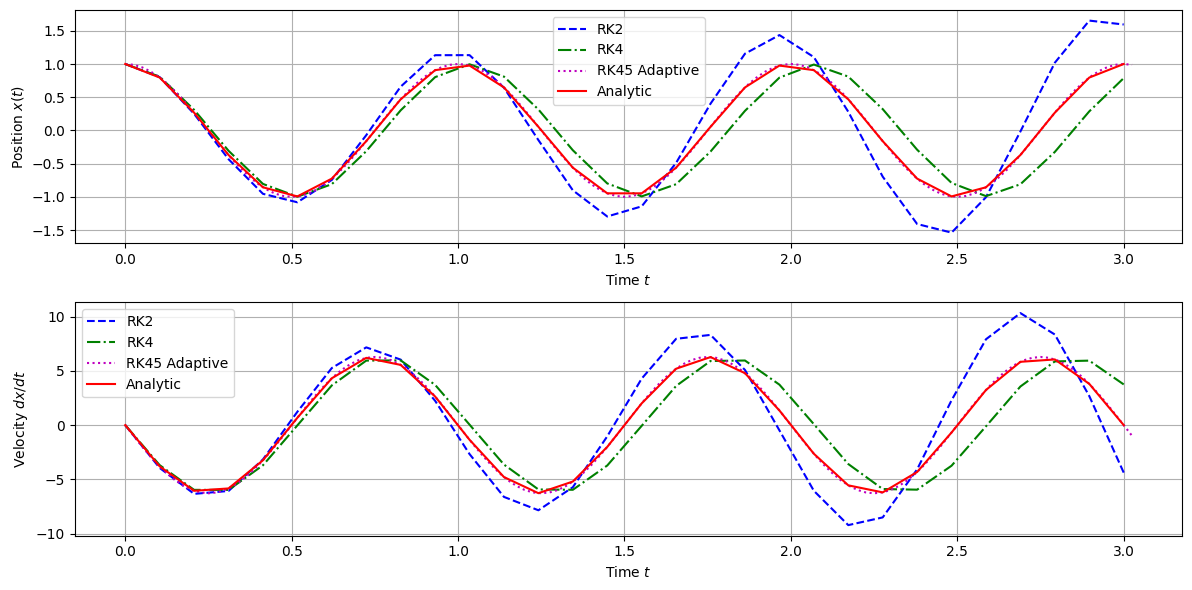

In [10]:
# Set parameters
t0 = 0.0
t_final = 3 
m = 1.0
k = 4 * np.pi**2  # for T = 1
p = 2  # Harmonic oscillator
y0 = np.array([1, 0.0])  # Initial conditions

omega0 = np.sqrt(k/m)
T = 2 * np.pi / omega0
h = T / 10  # Kinda good step size 

# Compare RK2 vs RK4 vs RK45
plotRKComparison(t0, t_final, h, m, k, p, y0)


5) Make a table of comparisons similar to Table 8.1, where we compare RK4 and RK45 for the two equations:
   $$
   2y y'' + y^2 - (y')^2 = 0, \tag{8.46}
   $$
   $$
   y'' + 6y^5 = 0, \tag{8.47}
   $$
   with initial conditions $[y(0), y'(0)] = [1,1]$. Although nonlinear, (8.46) does have the analytic solution:
   $$
   y(t) = 1 + \sin t.
   $$
   Equation (8.47) corresponds to our standard potential (8.5), with $ p = 6 $.

In [11]:
def f_846(t, y):
    """
    Function for equation (8.46): 
    2y y'' + y^2 - (y')^2 = 0
    Rewrite as a system:
    y1' = y2
    y2' = [(y2)^2 - y1^2] / (2  y1)
    """
    dydt = np.zeros(2)
    dydt[0] = y[1]  # y' = vel
    dydt[1] = (y[1]**2 - y[0]**2) / (2 * y[0])  # Acc
    return dydt

def f_847(t, y):
    """
    Function for equation (8.47):
    y'' + 6y^5 = 0
    Rewrite as a system:
    y1' = y2
    y2' = -6  y1^5
    """
    dydt = np.zeros(2)
    dydt[0] = y[1]  # y' = vel
    dydt[1] = -6 * y[0]**5  # Acc
    return dydt

def y_analytic_846(t):
    """Analytical solution for Equation (8.46): y(t) = 1 + sin(t)"""
    return 1 + np.sin(t)

In [12]:
import time

def run_solver(method, solver, f, h_init, t_final, eq_number, compute_error=False):
    """
    Runs RK4 or RK45 and collects:
    - Number of function evaluations (flops)
    - Execution time
    - Relative error (if applicable)
    """
    t0 = 0.0
    y0 = np.array([1.0, 1.0])  # [y(0), y'(0)]
    
    y = y0.copy()
    t = t0
    h = h_init
    flops = 0  # Count function evaluations

    # start execution time
    start_time = time.time()

    y_values = []
    t_values = []

    # Solve
    while t < t_final:
        if method == "RK4":
            y = solver(t, h, 2, y, f)
            t += h
        else:  # RK45
            y, t, h = solver(t, h, 2, y, f)

        y_values.append(y[0])
        t_values.append(t)
        flops += 1

    exec_time = (time.time() - start_time) * 1000 

    # Compute relative error, only if set to true
    rel_error = None
    if compute_error:
        y_exact = np.array([y_analytic_846(t) for t in t_values])
        rel_error = np.mean(np.abs((np.array(y_values) - y_exact) / y_exact))

    # Print the results
    print(f"({eq_number})".ljust(8), method.ljust(6), f"{h_init:.2f}".ljust(10), f"{flops}".ljust(12), f"{exec_time:.1f}".ljust(10),
          f"{rel_error:.2e}" if rel_error is not None else "")

In [13]:
# Print header
print("\n" + "Table for Comparison of ODE solvers for given equations")
print("-" * 75)
print("Eqn No.".ljust(8), "Method".ljust(6), "Initial h".ljust(10), "No. of flops".ljust(12), "Time (ms)".ljust(10), "Relative error")
print("-" * 75)

# Eq 8.46 (Analytical solution exists)
run_solver("RK4", rk4, f_846, 0.01, 10.0, "8.46", compute_error=True)
run_solver("RK45", rk45, f_846, 1.0, 10.0, "8.46", compute_error=True)

# Eq 8.47 (No analytical solution)
run_solver("RK4", rk4, f_847, 0.01, 10.0, "8.47", compute_error=False)
run_solver("RK45", rk45, f_847, 0.1, 10.0, "8.47", compute_error=False)

print("-" * 75)



Table for Comparison of ODE solvers for given equations
---------------------------------------------------------------------------
Eqn No.  Method Initial h  No. of flops Time (ms)  Relative error
---------------------------------------------------------------------------
(8.46)   RK4    0.01       1001         12.4       5.45e-01
(8.46)   RK45   1.00       191          10.8       3.15e-01
(8.47)   RK4    0.01       1001         10.6       
(8.47)   RK45   0.10       371          20.1       
---------------------------------------------------------------------------


## Exercise - Landau Section 8.5: Solution for Nonlinear Oscillations


Use your rk4 program to study anharmonic oscillations by trying powers in the range $p = 2–12$  for potential (8.5), or anharmonic strengths in the range $ 0 \leq \alpha x \leq 2 $ for potential (8.2). Do not include any explicit time-dependent forces yet. Note that for large values of $ p$, the forces and accelerations get large near the turning points, and so you may need a smaller step size $ h $ than that used for the harmonic oscillator.  

<div style="color: green;">

From the book, the potentials this is refering to are:

$$
V(x) \propto x^p \tag{8.5}
$$

$$
V(x) = \frac{k}{2}x^2 + \alpha x^3. \tag{8.2}
$$

I think 8.2 is easier to visualize, and its probably easier to program in the range $\alpha x$ from 0 to 2

We can find the equations of motion from this potential as:

$$
 \frac{d^2x}{dt^2}=−kx−3αx^2
$$
and rewrite them as a system of first-order ODEs:

$$
\frac{d}{dt} 
\begin{bmatrix} 
x \\ v 
\end{bmatrix} 
=
\begin{bmatrix} 
v \\ -k x - 3\alpha x^2 
\end{bmatrix}
$$

as a python function this is

</div>

In [14]:
def anharmonic_oscillator82(t, y, k, alpha): #eq 8.2
    x, v = y  # y contains position x and velocity v
    dxdt = v
    dvdt = -k * x - (3 * alpha * np.clip(x**2, -1e6, 1e6))  # Clamp large x^2 values
    return np.array([dxdt, dvdt])

def anharmonic_oscillator85(t, y, k, p): #eq 8.5
    x, v = y
    dxdt = v
    dvdt = -k * np.sign(x) * np.abs(x) ** (p - 1)  # Force -k  x^(p-1)
    return np.array([dxdt, dvdt])

<div style="color: green;">
Now let's see what that looks like with a plot.
    I noticed that I will be using the same code
    
``` python 
y = rk4(t, h, 2, y, lambda t, y: oscillator_function(t, y, k, param))
```
for all subsequent questions, so I decided to make it into a function, hopefully is easier this way
I could probably save me the trouble if I sticked with eq 8.5, but I was curious

</div>

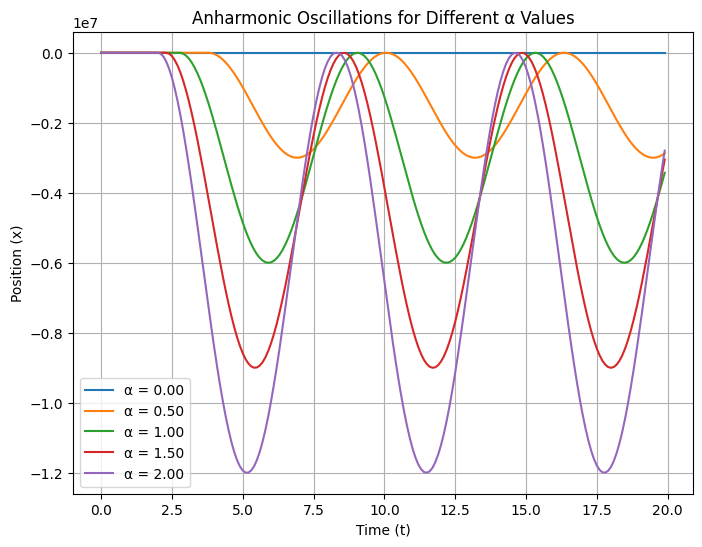

In [15]:
def simulate_oscillator(rk4, oscillator_function, t0, tf, h, y0, param_values, param_name, k):
    """
    Simulates an oscillator using the RK4 method.
    
    Parameters:
        rk4 (function): RK4 solver function.
        oscillator_function (function): Function defining the system dynamics.
        t0 (float): Initial time.
        tf (float): Final time.
        h (float): Time step size.
        y0 (array): Initial conditions [x0, v0].
        param_values (list or array): Values for the parameter being varied (e.g., alpha or p).
        param_name (str): Name of the parameter being varied (e.g., 'alpha' or 'p') for labeling.
        k (float): Spring constant or system coefficient.
        
    Returns:
        dict: A dictionary with parameter values as keys and (t_values, y_values) as values.
    """
    results = {}

    for param in param_values:
        t_values = np.arange(t0, tf, h)
        y_values = np.zeros((len(t_values), 2))  # Store (x, v) at each time step

        y = y0
        for i, t in enumerate(t_values):
            y_values[i] = y
            y = rk4(t, h, 2, y, lambda t, y: oscillator_function(t, y, k, param))

        results[param] = (t_values, y_values)  # Store time and state evolution

    return results

# Parameters
k = 1.0  
alpha_values = np.linspace(0, 2, 5) #for eq 8.2
p_values = [2, 4, 6, 8, 10]  # Different even p values  for eq 8.5

t0, tf = 0.0, 20.0  # Time range
h = 0.1 
y0 = np.array([1.0, 0.0])  # Initial condition (x=1, v=0)

results = simulate_oscillator(rk4, anharmonic_oscillator82, t0, tf, h, y0, alpha_values, 'alpha', k)

# Plot for different alpha values
plt.figure(figsize=(8, 6))

for alpha, (t_values, y_values) in results.items():
    plt.plot(t_values, y_values[:, 0], label=f'α = {alpha:.2f}')
    
plt.xlabel('Time (t)')
plt.ylabel('Position (x)')
plt.title('Anharmonic Oscillations for Different α Values')
plt.legend()
plt.grid()
plt.show()

<div style="color: green;">

I'm getting an overflow error and I think is because of the squared term on my function so im going to limit it with the clip() function so it dont pass 1e6 which should be enough to solve it

in anharmonic_oscillator()
change 

``` python
    dvdt = -k  x - 3  alpha  x2  
```

to 

``` python
    dvdt = -k  x - 3  alpha  np.clip(x2, -1e6, 1e6)
```

</div>

<span style="color: green;">
Now we can do 1.
check periodicity & max speed
</span>

1) Check that the solution remains periodic with constant amplitude and period
for all initial conditions regardless of how nonlinear you make the force. In addition, check  
that the maximum speed occurs at $ x = 0 $ and zero velocity at the maximum $|x|$'s, the  
latter being a consequence of energy conservation.  

<span style="color: green;">
To answer this question we can turn to see what a phase space plot looks like.
From the previous graphs we can see periodicity so, I expect the phase plot to be a closed loop
the curve should reach maximum v at x=0
and v = 0 at xmax
</span>


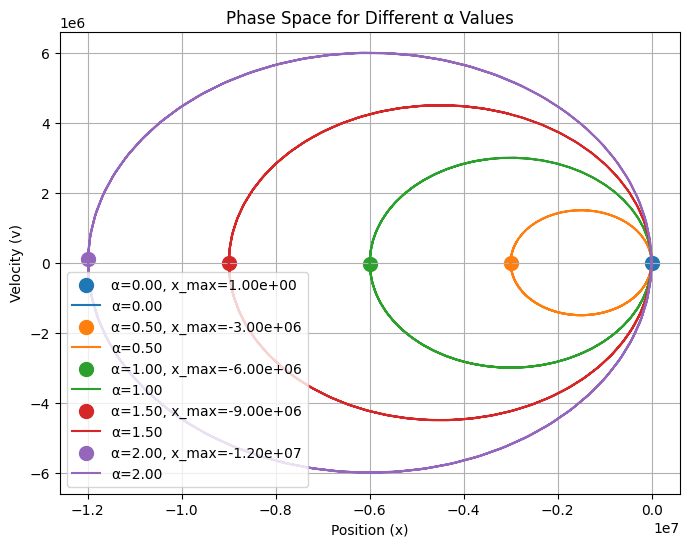

In [16]:
# Phase Space Plot (Position vs Velocity)
plt.figure(figsize=(8, 6))

for alpha, (t_values, y_values) in results.items():
    # Find xmax (maximum |x|) and verify v=0
    x_max_idx = np.argmax(np.abs(y_values[:, 0]))  # Index of max |x|
    x_max = y_values[x_max_idx, 0]
    v_at_x_max = y_values[x_max_idx, 1]

    # Mark xmax on the plot
    plt.scatter(x_max, v_at_x_max, marker='o', s=100, label=f'α={alpha:.2f}, x_max={x_max:.2e}')
    
    # Plot phase space trajectory
    plt.plot(y_values[:, 0], y_values[:, 1], label=f'α={alpha:.2f}')

plt.xlabel('Position (x)')
plt.ylabel('Velocity (v)')
plt.title('Phase Space for Different α Values')
plt.legend()
plt.grid()
plt.show()

2) Verify that nonharmonic oscillators are nonisochronous
that is, that vibrations with different amplitudes have different periods (Figure 8.7).


<span style="color: green;">
    From the graph above we can see different alphas gives differnte periods and even thou I used eq 8.2 instead of 8.5 (p changing), I think it reseambles some waht Figure 8.7
</span>

4) Explain why the shapes of the oscillations change for different $p$'s or $ \alpha $'s.

<span style="color: green;">
From eq 8.2 we got something that kind of looks as Hooke's law, so it makes sense to me that with small alphas we have the harmonic motion but as alpha increases the quadratic term is more visible resulting in shape change
</span>

5) Devise an algorithm to determine the period $ T $ of the oscillation
by recording times at which the mass passes through the origin. Note that because the motion may be  
asymmetric, you must record at least three times to deduce the period.  

<span style="color: green;">
    so we need to go checking all times
    record whether it changes sing (assymetry) at the origin
</span>

In [17]:
def measure_period(t_values, y_values):
    zero_crossings = [] #counter
    for i in range(1, len(t_values)): # Iterate over all time steps
        if y_values[i-1, 0] * y_values[i, 0] < 0:  # did the sign changed at x=0?
            zero_crossings.append(t_values[i]) # Record crossing time

    # Check if we have enough crossings
    if len(zero_crossings) < 3:  # Needs at least 3 crossings to measure the period
        return np.nan, zero_crossings  # Return NaN if not enough crossings
    
    periods = np.diff(zero_crossings)
    T_avg = np.mean(periods)
    return T_avg, zero_crossings

# periods for different α values
for alpha, (t_values, y_values) in results.items():
    T, zeros = measure_period(t_values, y_values)
    print(f"α = {alpha:.2f}, Number of crossings = {len(zeros)}, Estimated Period T = {T:.3f}")

α = 0.00, Number of crossings = 6, Estimated Period T = 3.140
α = 0.50, Number of crossings = 1, Estimated Period T = nan
α = 1.00, Number of crossings = 1, Estimated Period T = nan
α = 1.50, Number of crossings = 1, Estimated Period T = nan
α = 2.00, Number of crossings = 1, Estimated Period T = nan


In [18]:
# simulation using p_values, and p as parameter
results = simulate_oscillator(rk4, anharmonic_oscillator85, t0, tf, h, y0, p_values, 'p', k)

# Compute periods for different p values
for p, (t_values, y_values) in results.items():
    T, zeros = measure_period(t_values, y_values)
    print(f"p = {p}, Estimated Period T = {T:.3f}")

p = 2, Estimated Period T = 3.140
p = 4, Estimated Period T = 3.700
p = 6, Estimated Period T = 4.200
p = 8, Estimated Period T = 4.633
p = 10, Estimated Period T = 5.067


6) Verify that the motion is oscillatory, but not harmonic, as the energy approaches
$ E = \frac{k}{6\alpha^2} $ or for $ p > 6 $.

7) Verify that for the anharmonic oscillator with
$E = \frac{k}{6\alpha^2},$ the motion separates from oscillatory to translational. See how close you can get to this separatrix  
where a single oscillation takes an infinite time. (There is no separatrix for the power-law potential.)  

<div style="color: green;">
For this one recall that the potential is
$$
V(x) = \frac{k}{2}x^2 + \alpha x^3. \tag{8.2}
$$

then we can find the total energy as

$$
E =\frac{1}{2}v^2 + \frac{k}{2}x^2 + \alpha x^3.
$$

if we make this values approach $ E = \frac{k}{6\alpha^2} $ we should see what happens to the hamony of the motion.
</div>

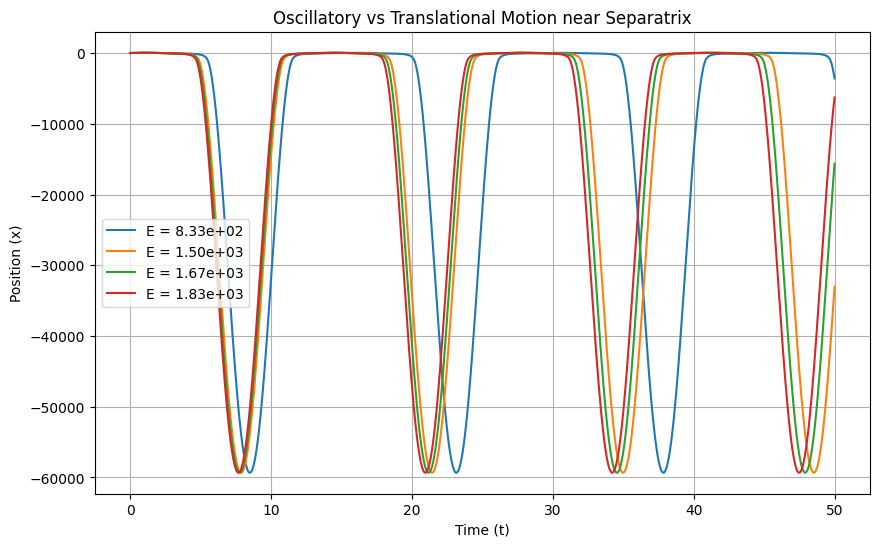

In [19]:
def total_energy82(y, k, alpha):
    x, v = y
    return 0.5 * v2 + 0.5 * k * x**2 + alpha * x**3  

# Parameters
k = 1.0  
alpha = 0.01
E_sep = k / (6 * alpha**2)  # Energy separatrix
t0, tf = 0.0, 50.0  
h = 0.001  

# Different initial energy values (below, near, and above separatrix)
E_values = [0.5 * E_sep, 0.9  * E_sep, E_sep, 1.1 * E_sep]

# clean results
results = {}

for E in E_values:
    # Compute initial velocity based on energy conservation
    x0 = 1.0  
    v0 = np.sqrt(2 * (E - 0.5 * k * x0**2 - alpha * x0**3)) if E > (0.5 * k * x0**2 + alpha * x0**3) else 0.0
    y0 = np.array([x0, v0])  

    # simulation
    results[E] = simulate_oscillator(rk4, anharmonic_oscillator82, t0, tf, h, y0, [alpha], 'alpha', k)

# Plot results
plt.figure(figsize=(10, 6))

for E, result in results.items():
    for alpha, (t_values, y_values) in result.items():  # Extract simulation data
        plt.plot(t_values, y_values[:, 0], label=f"E = {E:.2e}")

plt.xlabel("Time (t)")
plt.ylabel("Position (x)")
plt.title("Oscillatory vs Translational Motion near Separatrix")
plt.legend()
plt.grid()
plt.show()

<div style="color: green;">
    I don't see it that clearly in this plot so I want to try with eq 8.7 instead, maybe is easiert to see this behavior with a power instead of a polinomial
</div>

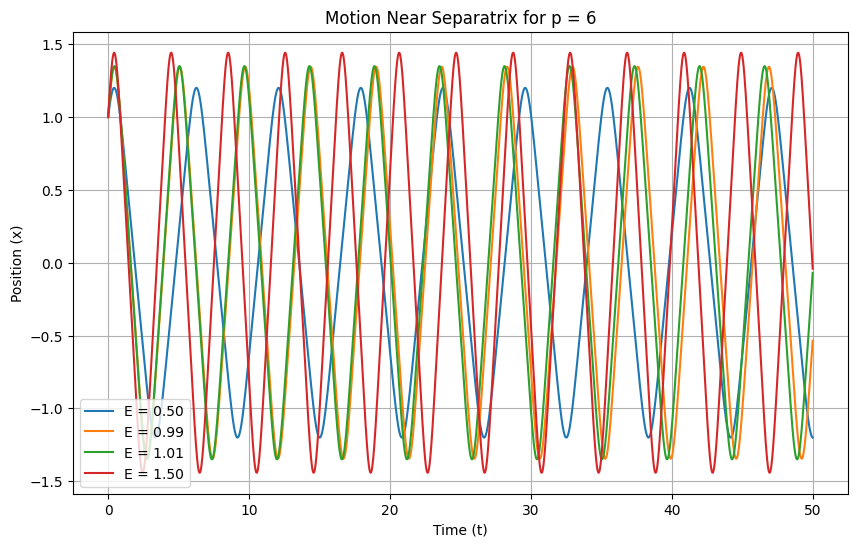

In [20]:
p = 6

# Compute total energy for the other potential
def total_energy85(y, k, p):
    x, v = y
    return 0.5 * v2 + (k / p) * np.abs(x)**p  

E_values = [0.5, 0.99, 1.01, 1.5]  # Different energy levels

results = {}

for E in E_values:
    # Compute initial velocity based on energy conservation
    x0 = 1.0  
    v0_squared = 2 * (E - (k / p) * np.abs(x0) ** p)
    v0 = np.sqrt(v0_squared) if v0_squared > 0 else 0.0
    y0 = np.array([x0, v0])  

    # Run simulation
    results[E] = simulate_oscillator(rk4, anharmonic_oscillator85, t0, tf, h, y0, [p], 'p', k)

# Plot results
plt.figure(figsize=(10, 6))

for E, result in results.items():
    for p_val, (t_values, y_values) in result.items():  # Extract simulation data
        plt.plot(t_values, y_values[:, 0], label=f"E = {E:.2f}")

plt.xlabel("Time (t)")
plt.ylabel("Position (x)")
plt.title(f"Motion Near Separatrix for p = {p}")
plt.legend()
plt.grid()
plt.show()

## Exercise - Landau Section 8.5.1: Precision Assessment via E Conservation

1) Plot the potential energy $PE(t) = V[x(t)]$, the kinetic energy $KE(t) = \frac{m v^2(t)}{2}$, and the total energy $E(t) = KE(t) + PE(t)$, for 50 periods. Comment on the correlation between $PE(t)$ and $KE(t)$ and how it depends on the potential parameters.

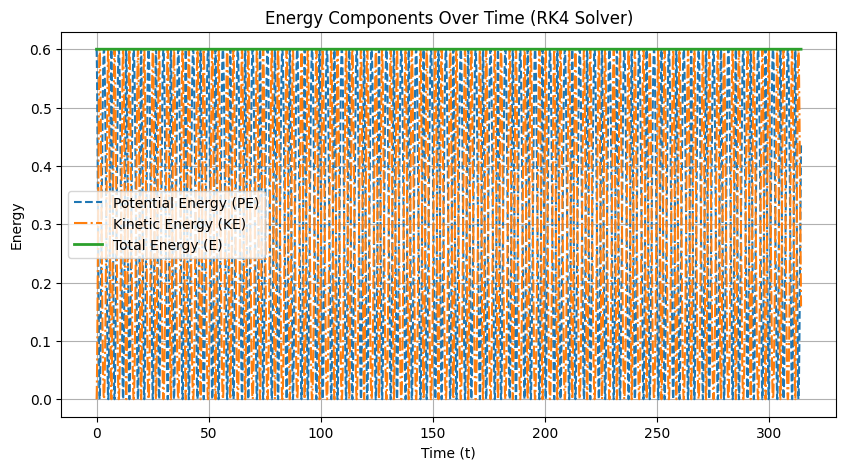

In [21]:
#potential energy 
def V(x):
    return (k/2) * x**2 + alpha * x**3

#kinetic energy 
def KE(v):
    return (m * v**2) / 2

# total energy 
def E(x, v):
    return KE(v) + V(x)

k = 1.0
alpha = 0.1
m = 1.0

h = 0.001  
T = 50 * (2 * np.pi / np.sqrt(k/m))  # 50 periods
N = int(T / h)
t_values = np.linspace(0, T, N)

y = np.array([1.0, 0.0])  
x_vals = np.zeros(N)
v_vals = np.zeros(N)

# Time evolution using RK4
for i in range(N):
    x_vals[i], v_vals[i] = y
    y = rk4(t_values[i], h, 2, y, lambda t, y: anharmonic_oscillator82(t, y, k, alpha))

#energies
PE_vals = V(x_vals)
KE_vals = KE(v_vals)
E_vals = KE_vals + PE_vals

# Plot
plt.figure(figsize=(10, 5))
plt.plot(t_values, PE_vals, label="Potential Energy (PE)", linestyle="--")
plt.plot(t_values, KE_vals, label="Kinetic Energy (KE)", linestyle="-.")
plt.plot(t_values, E_vals, label="Total Energy (E)", linewidth=2)
plt.xlabel("Time (t)")
plt.ylabel("Energy")
plt.title("Energy Components Over Time (RK4 Solver)")
plt.legend()
plt.grid()
plt.show()


2) Check the long-term stability of your solution by plotting

$$
-\log_{10} \left| \frac{E(t) - E(t=0)}{E(t=0)} \right| \approx \text{number of places of precision}
$$

for a large number of periods (Figure 8.6). Because $E(t)$ should be independent of time, the numerator is the absolute error in your solution, and when divided by $E(0)$, it becomes the relative error (say $10^{-11}$). If you cannot achieve 11 or more places, then you need to decrease the value of $h$ or debug.

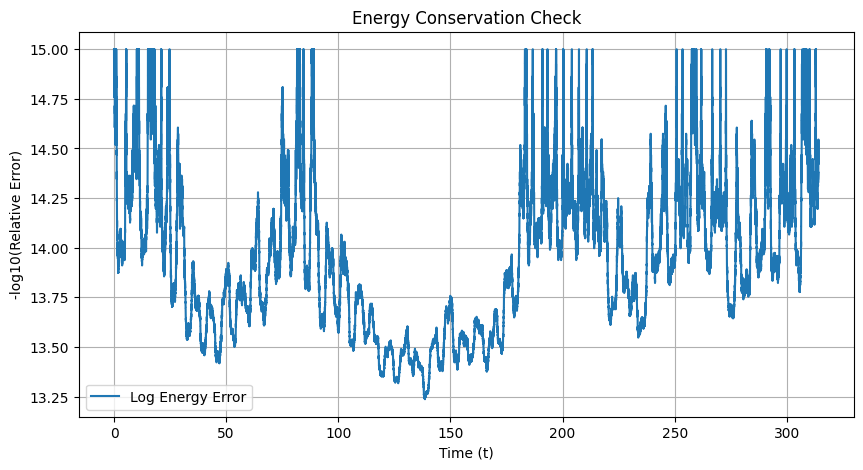

In [22]:
# relative energy error
rel_error = np.abs((E_vals - E_vals[0]) / E_vals[0])
log_error = -np.log10(rel_error + 1e-15)  # Avoid log(0)

plt.figure(figsize=(10, 5))
plt.plot(t_values, log_error, label="Log Energy Error")
plt.xlabel("Time (t)")
plt.ylabel("-log10(Relative Error)")
plt.title("Energy Conservation Check")
plt.legend()
plt.grid()
plt.show()

3) Because a particle bound by a large-$p$ oscillator is essentially “free” most of the time, you should observe that the average of its kinetic energy over time exceeds its average potential energy. This is actually the physics behind the Virial theorem for a power-law potential [Marion and Thornton, 2019]:

$$
\langle KE \rangle = \frac{p}{2} \langle PE \rangle.
$$

Verify that your solution satisfies the Virial theorem. (Those readers who have worked on the perturbed oscillator problem can use this relation to deduce an effective $p$ value, which should be between 2 and 3.)

In [23]:
#  time-averaged 
KE_avg = np.mean(KE_vals)
PE_avg = np.mean(PE_vals)

#  effective p value
p_eff = 2 * (KE_avg / PE_avg)

print(f"Average Kinetic Energy ⟨KE⟩: {KE_avg:.6f}")
print(f"Average Potential Energy ⟨PE⟩: {PE_avg:.6f}")
print(f"Effective p value: {p_eff:.6f}")


Average Kinetic Energy ⟨KE⟩: 0.292180
Average Potential Energy ⟨PE⟩: 0.307820
Effective p value: 1.898387


<span style="color: green;">
I guess since I used eq 8.2 the peff is not between 2 and 3, but it is close.
    also the Average Kinetic Energy is not higher than the Average Potential Energy
</span>

## Exercise – Landau Section 8.6.1: Friction

1. Extend your harmonic oscillator code to include the three types of friction in (8.50),  
   and observe how the motion differs for each.  

2. Hint: For the simulation with static plus kinetic friction, each time the oscillator has  
   $ v = 0 $, you need to check that the restoring force exceeds the static force of friction.  
   If not, the oscillation must end at that instant. Check that your simulation terminates at  
   nonzero $ x $ values.  

$$
F_{\text{static}} \leq -\mu_s N, \quad  
F_{\text{kinetic}} = -\mu_k N \frac{v}{|v|}, \quad  
F_{\text{viscous}} = -b v.
\tag{8.50}
$$

<span style="color: green;">
okay back to the fist problem
I wrote a function for the harmonic oscillator (p=2) and I deliverately left F_ext as 0
now we can change that function so it has the behavior that (8.50) shows.
</span>

In [24]:
# parameters
m = 1.0   # Mass
k = 10   # Spring constant
p = 2     # Hooke's law exponent (p=2 is harmonic oscillator)
mu_s = 0.3  # Static friction coefficient
mu_k = 0.2  # Kinetic friction coefficient
b = 0.1     # Viscous friction coefficient
g = 9.81    # Gravity

# Normal force (assume the system is horizontal, so N = mg)
N = m * g

def F_ext_all(x, v, t):
    """ Computes external forces including friction. """
    F_restoring = -k * x  # Spring force

    # Static friction: Prevent motion only if restoring force is slightly weaker than needed
    if v == 0 and abs(F_restoring) < mu_s * N:
        return -F_restoring  # Exactly cancels motion

    
    # Kinetic friction: Opposes motion when moving
    elif v != 0:
        F_friction = -mu_k * N * (v / abs(v))  # Opposite direction to velocity
    else:
        F_friction = 0  # No friction applied

    
    # Viscous friction: Proportional to velocity
    F_viscous = -b * v

    return F_friction + F_viscous

<span style="color: green;">
Now we can plot this using the f() from the begining, our new F_ext
    and either rk4 or rk45
</span>

In [25]:
# Initial conditions
x0 = 10   #  displacement
v0 = 1   #  velocity
y = np.array([x0, v0])

t = 0
t_final = 20  # Simulate for 20 seconds
h = 0.01      # Initial step size

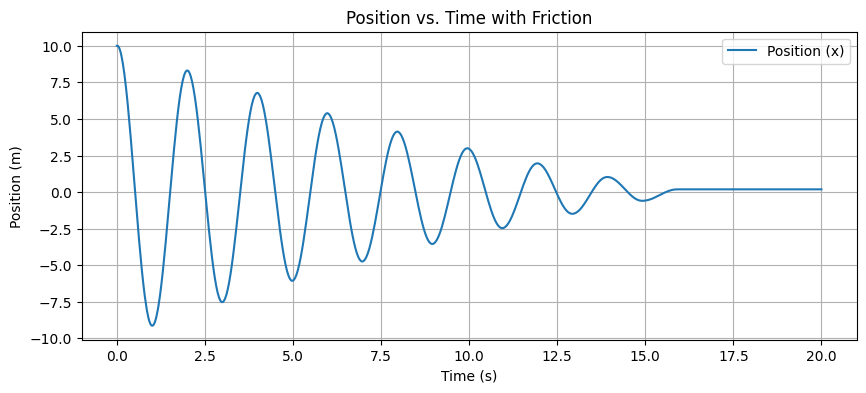

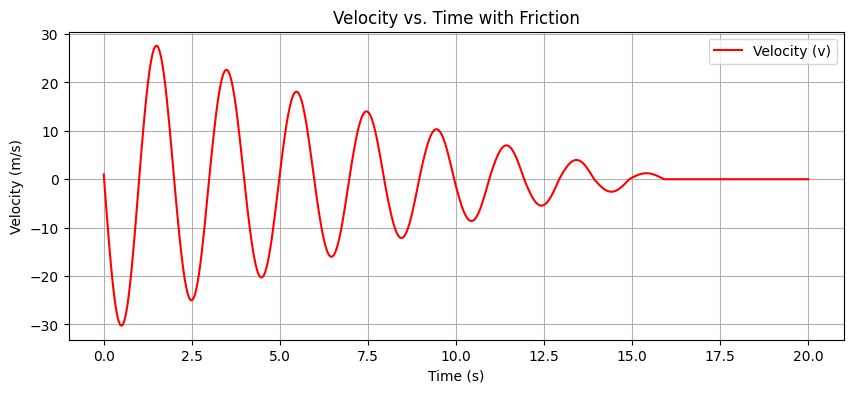

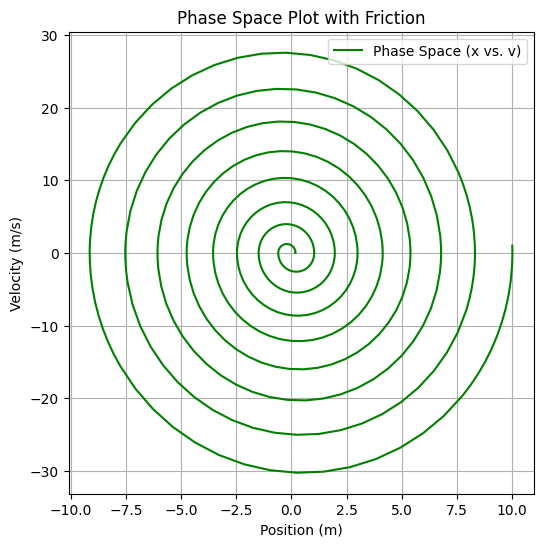

In [26]:
# Lists to store results
t_values = []
x_values = []
v_values = []

# lambda to correctly pass extra arguments
f_fixed = lambda t, y: f(t, y, m, k, p, F_ext_all)

# Run RK45 iteration
while t < t_final:
    t_values.append(t)
    x_values.append(y[0])
    v_values.append(y[1])

    # Pass f_fixed to rk45, it only takes (t, y)
    y, t, h = rk45(t, h, len(y), y, f_fixed)

t_values = np.array(t_values)
x_values = np.array(x_values)
v_values = np.array(v_values)

#  Position vs. Time
plt.figure(figsize=(10, 4))
plt.plot(t_values, x_values, label="Position (x)")
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.title("Position vs. Time with Friction")
plt.legend()
plt.grid()
plt.show()

#  Velocity vs. Time
plt.figure(figsize=(10, 4))
plt.plot(t_values, v_values, label="Velocity (v)", color="r")
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")
plt.title("Velocity vs. Time with Friction")
plt.legend()
plt.grid()
plt.show()

# Phase 
plt.figure(figsize=(6, 6))
plt.plot(x_values, v_values, label="Phase Space (x vs. v)", color="g")
plt.xlabel("Position (m)")
plt.ylabel("Velocity (m/s)")
plt.title("Phase Space Plot with Friction")
plt.legend()
plt.grid()
plt.show()

<span style="color: green;">
Now I realized that it would be a good idea to separate each friction so we can see how they behave
</span>

In [27]:
# Static + kinetic
def F_ext_kinetic_static(x, v, t):
    F_restoring = -k * x
    static_limit = mu_s * N

    if v == 0 and abs(F_restoring) < static_limit:
        return -F_restoring  # Static friction cancels motion

    elif v != 0:
        F_friction = -mu_k * N * (v / abs(v))
    else:
        F_friction = 0

    return F_friction

# Viscous friction
def F_ext_viscous(x, v, t):
    return -b * v


In [28]:
def simulate_and_plot(F_ext_model, title):
    f_fixed = lambda t, y: f(t, y, m, k, p, F_ext_model)

    y = np.array([x0, v0])
    t = 0
    h = 0.01

    t_values, x_values, v_values = [], [], []

    while t < t_final:
        t_values.append(t)
        x_values.append(y[0])
        v_values.append(y[1])
        y, t, h = rk45(t, h, len(y), y, f_fixed)

    t_values = np.array(t_values)
    x_values = np.array(x_values)
    v_values = np.array(v_values)

    fig, axes = plt.subplots(1, 2, figsize=(14, 4), gridspec_kw={'width_ratios': [3, 2]})
    
    # Time 
    axes[0].plot(t_values, x_values, label="x(t)")
    axes[0].plot(t_values, v_values, label="v(t)", linestyle="--")
    axes[0].set_title(f"{title} — Position & Velocity")
    axes[0].set_xlabel("Time (s)")
    axes[0].legend()
    axes[0].grid()

    # Phase space 
    axes[1].plot(x_values, v_values, color="green")
    axes[1].set_title(f"{title} — Phase Space")
    axes[1].set_xlabel("Position (x)")
    axes[1].set_ylabel("Velocity (v)")
    axes[1].grid()

    plt.tight_layout()
    plt.show()

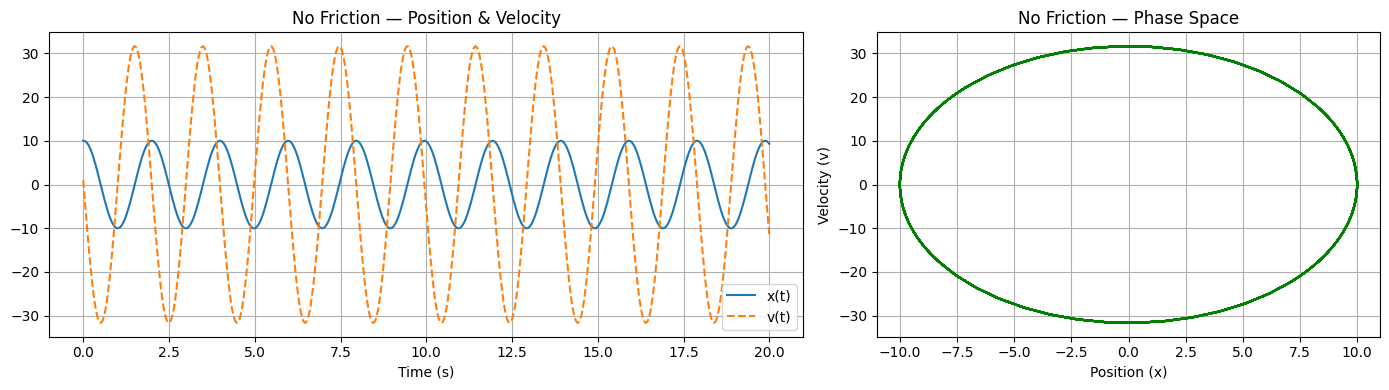

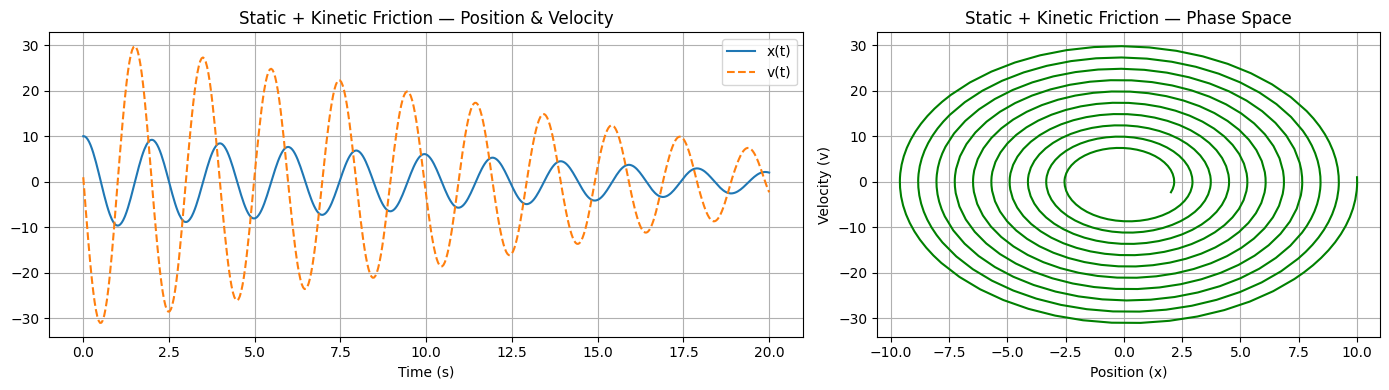

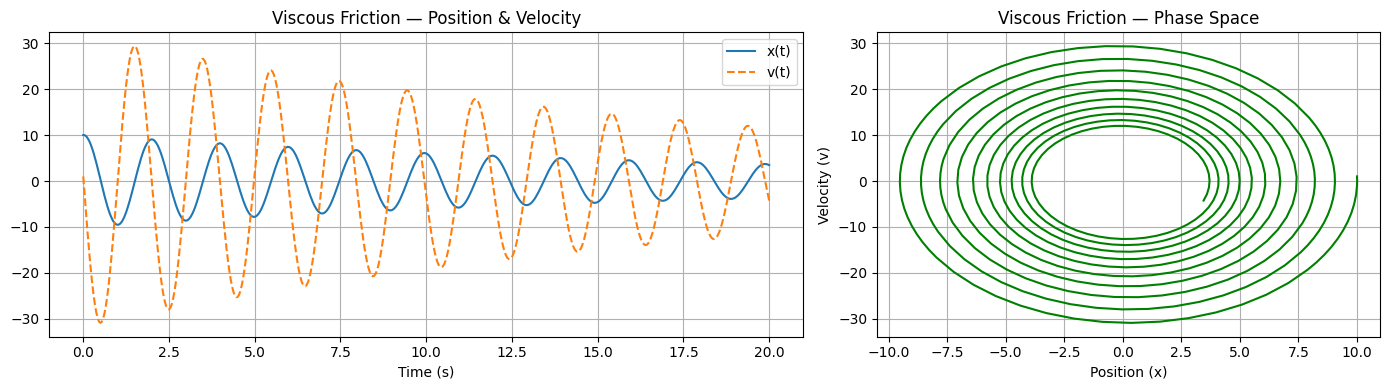

In [29]:
simulate_and_plot(F_ext, "No Friction")
simulate_and_plot(F_ext_kinetic_static, "Static + Kinetic Friction")
simulate_and_plot(F_ext_viscous, "Viscous Friction")


3. For your simulations with viscous friction, investigate the qualitative changes that occur  
   for increasing $ b $ values:

   - Underdamped: $ b < 2m\omega_0 $ — Oscillates with a decaying envelope.  
   - Critically damped: $ b = 2m\omega_0 $ — No oscillations, finite decay time.  
   - Overdamped: $ b > 2m\omega_0 $ — No oscillations, infinite decay time.

Simulating Underdamped case: b = 1.000


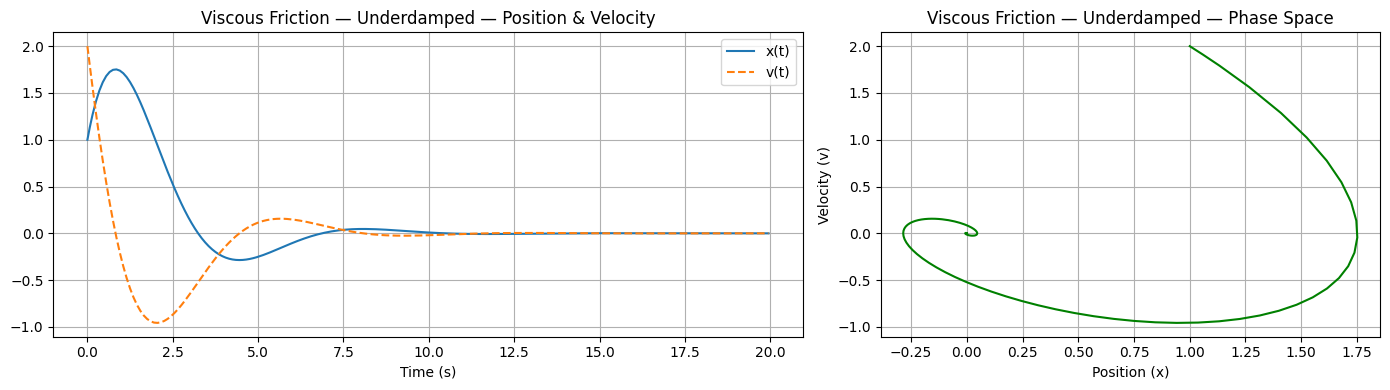

Simulating Critically Damped case: b = 2.000


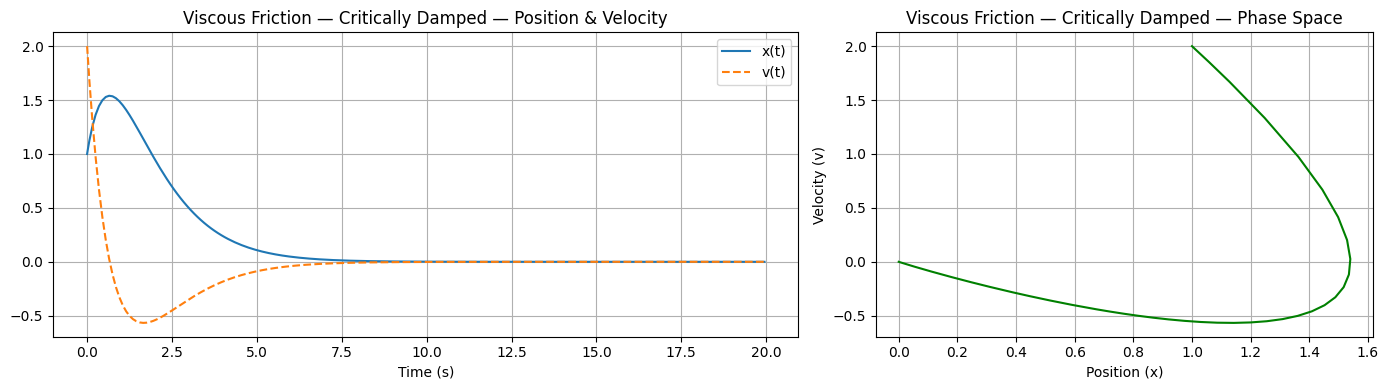

Simulating Overdamped case: b = 4.000


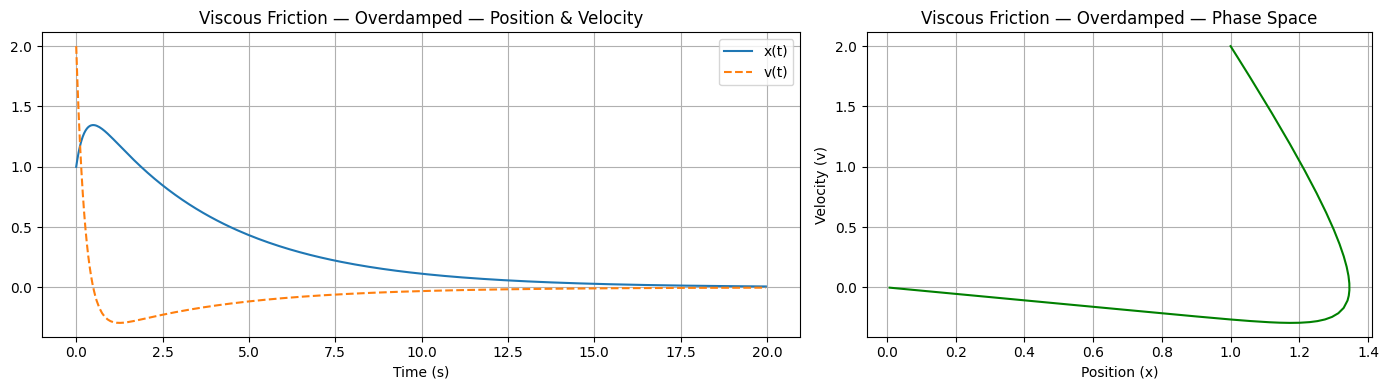

In [30]:
m = 1.0
k = 1.0
omega0 = np.sqrt(k / m)

x0 = 1.0
v0 = 2.0
t_final = 20


def get_F_ext_viscous(b_value):
    return lambda x, v, t: -b_value * v

b_underdamped = 0.5 * 2 * m * omega0     
b_critical    = 1.0 * 2 * m * omega0     
b_overdamped  = 2.0 * 2 * m * omega0     


damping_cases = [
    ("Underdamped", b_underdamped),
    ("Critically Damped", b_critical),
    ("Overdamped", b_overdamped)
]

for label, b_val in damping_cases:
    print(f"Simulating {label} case: b = {b_val:.3f}")
    F_vis = get_F_ext_viscous(b_val)
    simulate_and_plot(F_vis, f"Viscous Friction — {label}")

## (Grad Students) Exercise - Landau Section 8.6.3: Time-Dependent Forces

To extend our simulation to include an external force:

$$ F_{ext}(t) = F_0 \sin(\omega t) \tag{8.52} $$

we need to include a time dependence in the force function $ f(t, y) $ of our ODE solver.

1. Add the sinusoidal time-dependent external force (Equation 8.52) to the space-dependent restoring force in your program. (Do not include friction yet.)


<div style="color: green;">
    remember the original function of the oscilator:

``` python
    # f(t, y) based on equation (8.26)
    def f(t, y, m, k, p, F_ext):
    """
    Computes dy/dt for the system:
    y[0] -> position x(t)
    y[1] -> velocity dx/dt
    """
    dydt = np.zeros(2)
    dydt[0] = y[1]  # dy(0)/dt = velocity
    dydt[1] = (1/m) * (F_ext(y[0], y[1], t) - k*y[0]**(p-1))  # dy(1)/dt = acceleration
    return dydt

    def F_ext(x, v, t):
    return 0  #No external force
```
</div>

In [31]:
def F_ext_t(omega, t):
    #return F0 * np.sin(omega*t) should be enought, but my function takes 3 parameters so
    return lambda x, v, t: F0 * np.sin(omega * t) # even if x an v are empty

2. Start with a very large value for the magnitude of the driving force $ F_0 $. This should lead to mode locking (the 500-pound-gorilla effect), where the system is overwhelmed by the driving force and, after transients die out, oscillates in phase with the driver regardless of the driver’s frequency.


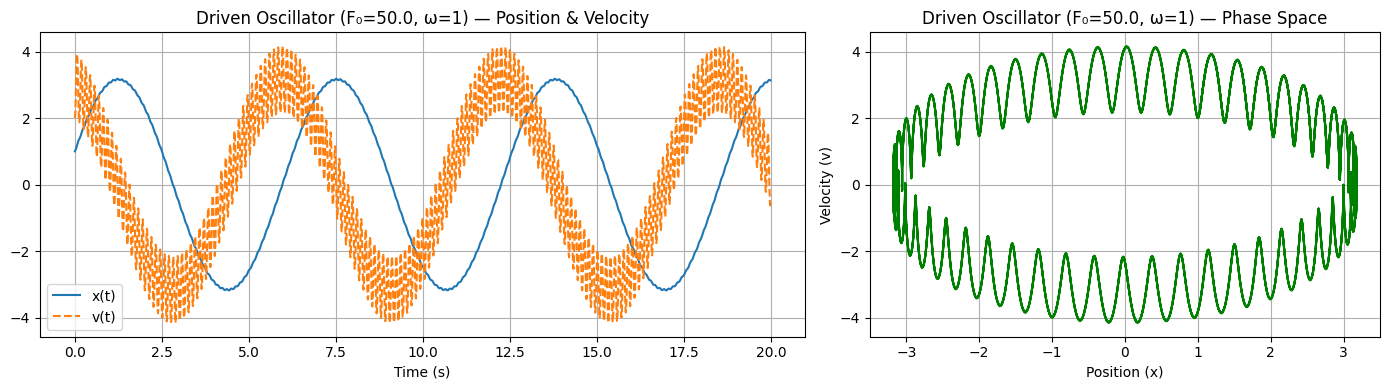

In [32]:
m = 1.0
k = 1.0

x0 = 1.0
v0 = 2.0
t_final = 20

F0 = 50.0 #large force
omega = 1

F_ext = F_ext_t(F0, omega)
simulate_and_plot(F_ext, f"Driven Oscillator (F₀={F0}, ω={omega})")



3. Now Lower $ F_0 $ until it is close to the magnitude of the natural restoring force of the system. You need to have this near equality for beating to occur.



<div style="color: green;">
$F_{restoring}$ is hooke's law, so we need something that matches 
$$
F_{restoring} = k x_0
$$ 

Let us use m = 3 and k = 2 so omega0 is not 1, like this

``` python
m = 3.0
k = 2.0
omega0 = np.sqrt(k / m) #1.224744871391589

x0 = 0.5
v0 = 2.0
t_final = 20
```

Have x0 = 0.5 so I can use F0 = 1
</div>

4. Verify the beat frequency for the harmonic oscillator (the number of variations in intensity per unit time) should equal the frequency difference $ \frac{\omega - \omega_0}{2\pi} $ in cycles per second, where $ \omega \approx \omega_0 $.

In [33]:
m = 3.0
k = 2.0
omega0 = np.sqrt(k / m)

x0 = 0.5
v0 = 0.1
t_final = 100

F0 = 1 #small force
omega = omega0 * 0.95 #omega close to omega0

f_beat_theory = abs(omega - omega0) / (2 * np.pi)
print(f"Theoretical beat frequency: {f_beat_theory:.4f} Hz")

Theoretical beat frequency: 0.0065 Hz


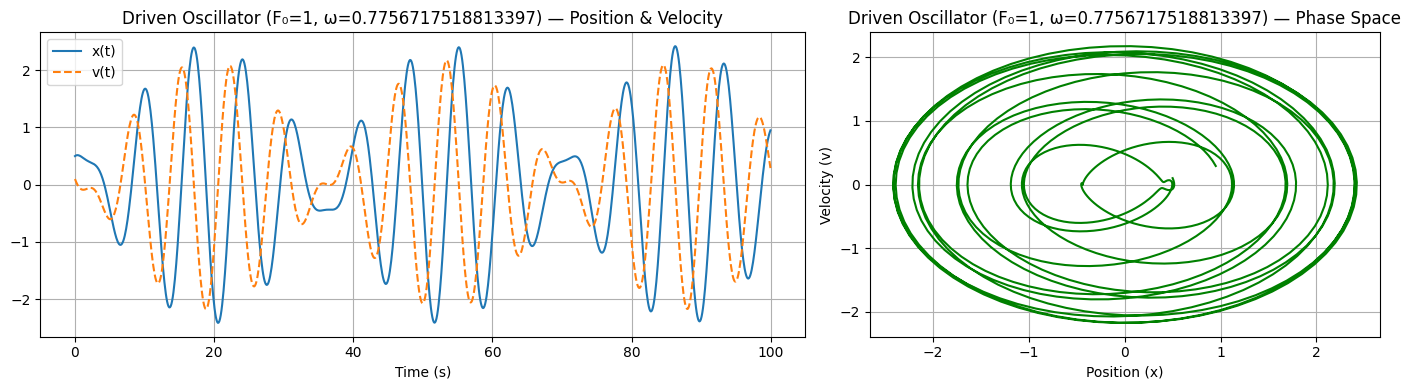

In [34]:
F_ext = F_ext_t(F0, omega)
simulate_and_plot(F_ext, f"Driven Oscillator (F₀={F0}, ω={omega})")


<span style="color: green;">
    I'm not quite sure about that frequency, 0.0065 seems to small, from the graph I would say
    $T \sim 20$ seconds, so $1/T \sim 0.045$ Hz
</span>

<span style="color: green;">
    Anyway, playing around with the value of F0, I think 1 has the beating behavior for that k and m. So I'll stick with that
</span>

5) Once you have a value for $ F_0 $ matched well with your system, make a series of runs in which you progressively increase the frequency of the driving force for the frequency range:
   
   $$ \frac{\omega_0}{10} \leq \omega \leq 10\omega_0 $$ 

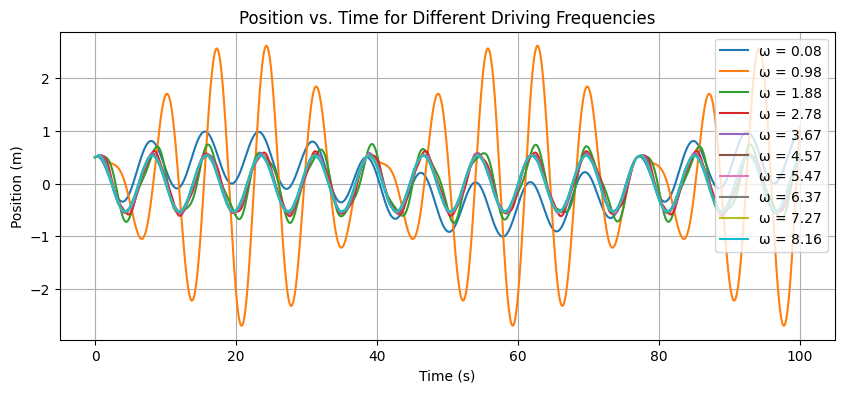

In [45]:
m = 3.0
k = 2.0
omega0 = np.sqrt(k / m)

x0 = 0.5
v0 = 0.1
t_final = 100
h = 0.01  # Step size

F0 = 1  # Small force
omega_values = np.linspace(omega0 / 10, 10 * omega0, num=10) 

# Store amplitude results
amplitudes = []

#redifine functions bc this thing gets confused, and so do I
# RK4 integration method
def rk4(t, h, N, y, f):
    k1 = h * f(t, y)
    k2 = h * f(t + h/2., y + k1/2.)
    k3 = h * f(t + h/2., y + k2/2.)
    k4 = h * f(t + h, y + k3)
    return y + (k1 + 2*(k2 + k3) + k4) / 6.

# Differential equation system
def f(t, y, m, k, p, F_ext):
    dydt = np.zeros(2)
    dydt[0] = y[1]  # Velocity
    dydt[1] = (1/m) * (F_ext(y[0], y[1], t) - k * np.clip(y[0],-10,10)**(p-1))  # Nonlinear restoring force
    return dydt

# External force function generator
def F_ext_t(F0, omega):
    return lambda x, v, t: F0 * np.sin(omega * t)  # Returns function for given ω


plt.figure(figsize=(10, 4))

# Sweep through different frequencies
for omega in omega_values:
    t = 0
    y = np.array([x0, v0])

    t_values = []
    x_values = []

    # Ensure F_ext_t returns a **fresh function** for each ω
    F_ext_instance = F_ext_t(F0, omega)  # Create function instance
    f_fixed = lambda t, y, omega=omega: f(t, y, m, k, 2, F_ext_t(F0, omega))  # Explicitly bind omega, if not re assigned it only plots for 1 omega (first one)

    while t < t_final:
        t_values.append(t)
        x_values.append(y[0])

        # RK4 Step
        y = rk4(t, h, len(y), y, f_fixed)
        t += h  # Update time

    amplitudes.append(np.max(np.abs(x_values))) 
    # Store and plot results
    plt.plot(t_values, x_values, label=f"ω = {omega:.2f}")
 
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.title("Position vs. Time for Different Driving Frequencies")
plt.legend()
plt.grid()
plt.show()

6) Make a plot of the maximum amplitude of oscillation versus the driver’s $ \omega $.

<div style="color: green;">
I think we can acomplish that adding a line that stores the max amplitude in the code above, after evaluating rk4

something like

```python
    amplitudes.append(np.max(np.abs(x_values)))  # Get max amplitude
```

then we can plot the amplitudes and omegas
</div>

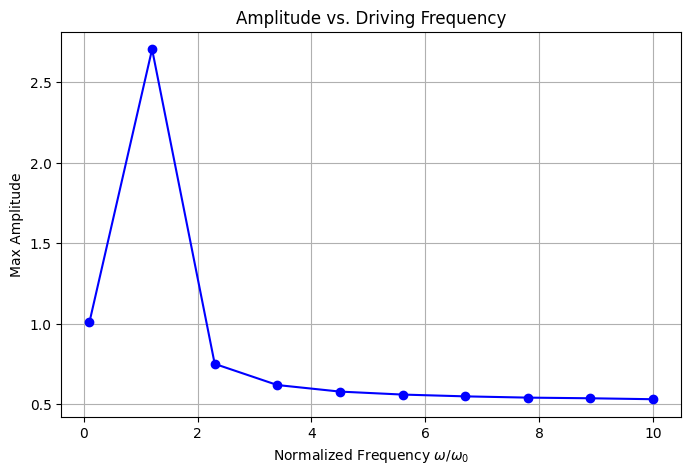

In [46]:
# Convert frequencies to normalized form
omega_normalized = omega_values / omega0

# Plot amplitude vs. frequency
plt.figure(figsize=(8, 5))
plt.plot(omega_normalized, amplitudes, marker="o", linestyle="-", color="b")
plt.xlabel(r"Normalized Frequency $\omega / \omega_0$")
plt.ylabel("Max Amplitude")
plt.title("Amplitude vs. Driving Frequency")
plt.grid()
plt.show()

7) Explore what happens when you make a nonlinear system resonate. If the nonlinear system is close to being harmonic, you should get beating in place of the blowup that occurs for the linear system. Beating occurs because the natural frequency changes as the amplitude increases, and thus the natural and forced oscillations fall out of phase. Yet once out of phase, the external force stops feeding energy into the system, and so the amplitude decreases. With the decrease in amplitude, the frequency of the oscillator returns to its natural frequency, the driver and oscillator get back in phase, and the entire cycle repeats.

<div style="color: green;">
    So far we been working with $p=2$ so like
    
``` python
        f_fixed = lambda t, y, omega=omega: f(t, y, m, k, 2, F_ext_t(F0, omega))  
```
</div>
<span style="color: green;">
    that is
    $$
    F_{restoring} = -kx
    $$
    to make it non-linear
    $$
    F_{restoring} = -kx^p
    $$
</span>

<div style="color: green;">
    So p equals 3 broke my code, im getting this

``` python
    RuntimeWarning: overflow encountered in scalar power
    dydt[1] = (1/m) * (F_ext(y[0], y[1], t) - k*y[0]**(p-1))  # Acceleration
```

So, I need to preven it from blowing up using the clip function

change previous line in my f() with
``` python
    RuntimeWarning: overflow encountered in scalar power
    dydt[1] = (1/m) * (F_ext(y[0], y[1], t) - k*np.clip(y[0],-10,10)**(p-1))  # Acceleration
```
</div>


8) Investigate now how the inclusion of viscous friction modifies the curve of amplitude versus driver frequency. You should find that friction broadens the curve.

9) Explain how the character of the resonance changes as the exponent $ p $ in the potential:
   
   $$ V(x) = k \frac{|x|^p}{p} $$ 
   
   is made larger and larger. At large $ p $, the mass effectively “hits” the wall and falls out of phase with the driver, and so the driver is less effective at pumping energy into the system.

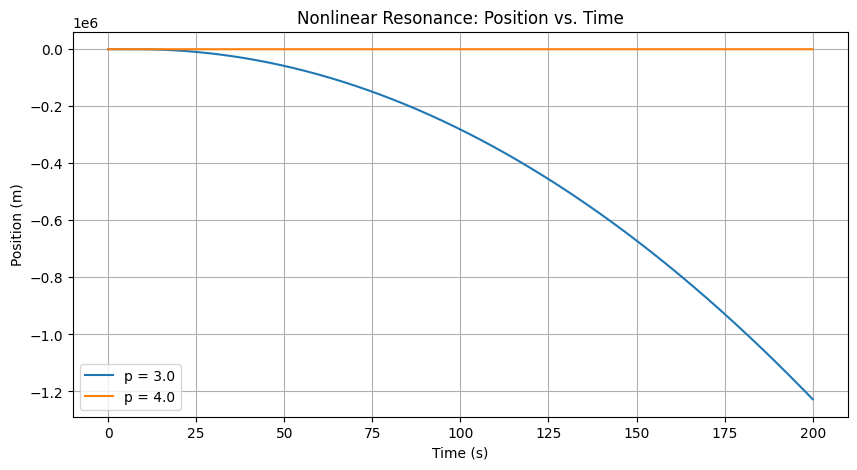

In [47]:
m = 3.0
k = 2.0
omega0 = np.sqrt(k / m)

x0 = 0.5
v0 = 0.1
t_final = 200 
h = 0.01  # Step size

F0 = 1  # Small force
omega = omega0 * 0.95  
p_values = [3.0, 4.0]  # Different nonlinearity levels

plt.figure(figsize=(10, 5))

for p in p_values:
    t = 0
    y = np.array([x0, v0])

    t_values = []
    x_values = []

    # Ensure F_ext_t returns a **fresh function** for each ω
    F_ext_instance = F_ext_t(F0, omega)
    f_fixed = lambda t, y, p=p: f(t, y, m, k, p, F_ext_instance)  # Correctly bind p

    while t < t_final:
        t_values.append(t)
        x_values.append(y[0])

        # RK4 Step
        y = rk4(t, h, len(y), y, f_fixed)
        t += h  # Update time

    # Convert lists to arrays
    t_values = np.array(t_values)
    x_values = np.array(x_values)

    # Plot nonlinear response
    plt.plot(t_values, x_values, label=f"p = {p}")

plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.title("Nonlinear Resonance: Position vs. Time")
plt.legend()
plt.grid()
plt.show()